<a href="https://colab.research.google.com/github/DhruvAjayToshniwal/Bollinger-Bands-Trading-Strategy-with-Python/blob/main/Bollinger_Bands_Trading_Strategy_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2020-1-1')

# See the data
print(tickerDf)

                                 Open        High         Low       Close  \
Date                                                                        
2020-01-02 00:00:00-05:00   71.962067   73.021194   71.707006   72.960464   
2020-01-03 00:00:00-05:00   72.183112   73.016320   72.025217   72.251129   
2020-01-06 00:00:00-05:00   71.366925   72.865726   71.114289   72.826859   
2020-01-07 00:00:00-05:00   72.836564   73.094056   72.263280   72.484337   
2020-01-08 00:00:00-05:00   72.185534   73.953977   72.185534   73.650330   
...                               ...         ...         ...         ...   
2024-06-17 00:00:00-04:00  213.369995  218.949997  212.720001  216.669998   
2024-06-18 00:00:00-04:00  217.589996  218.630005  213.000000  214.289993   
2024-06-20 00:00:00-04:00  213.929993  214.240005  208.850006  209.679993   
2024-06-21 00:00:00-04:00  210.389999  211.889999  207.110001  207.490005   
2024-06-24 00:00:00-04:00  207.720001  208.669998  206.589996  208.487595   

In [2]:
# Bollinger Bands
tickerDf['20 Day MA'] = tickerDf['Close'].rolling(window=20).mean()
tickerDf['20 Day STD'] = tickerDf['Close'].rolling(window=20).std()
tickerDf['Upper Band'] = tickerDf['20 Day MA'] + (tickerDf['20 Day STD'] * 2)
tickerDf['Lower Band'] = tickerDf['20 Day MA'] - (tickerDf['20 Day STD'] * 2)

# Simple Moving Averages
tickerDf['SMA_10'] = tickerDf['Close'].rolling(window=10).mean()
tickerDf['SMA_50'] = tickerDf['Close'].rolling(window=50).mean()
tickerDf['SMA_200'] = tickerDf['Close'].rolling(window=200).mean()

# Exponential Moving Averages
tickerDf['EMA_12'] = tickerDf['Close'].ewm(span=12, adjust=False).mean()
tickerDf['EMA_26'] = tickerDf['Close'].ewm(span=26, adjust=False).mean()

# Moving Average Convergence Divergence
tickerDf['MACD_line'] = tickerDf['EMA_12'] - tickerDf['EMA_26']
tickerDf['Signal_line'] = tickerDf['MACD_line'].ewm(span=9, adjust=False).mean()
tickerDf['MACD_Hist'] = tickerDf['MACD_line'] - tickerDf['Signal_line']

In [3]:
tickerDf.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,20 Day MA,20 Day STD,Upper Band,Lower Band,SMA_10,SMA_50,SMA_200,EMA_12,EMA_26,MACD_line,Signal_line,MACD_Hist
Date,,,,,,,,,,,,,,,,,,,
2024-06-17 00:00:00-04:00,213.369995,218.949997,212.720001,216.669998,93728300,0.0,0.0,197.366499,9.505027,216.376552,178.356446,203.833000,184.188404,182.168509,204.400253,196.413951,7.986301,6.108458,1.877843
2024-06-18 00:00:00-04:00,217.589996,218.630005,213.000000,214.289993,79943300,0.0,0.0,198.528999,10.094076,218.717151,178.340848,205.826999,185.109767,182.304310,205.921751,197.738103,8.183649,6.523496,1.660152
2024-06-20 00:00:00-04:00,213.929993,214.240005,208.850006,209.679993,86172500,0.0,0.0,199.395499,10.277889,219.951277,178.839720,207.207999,185.914564,182.409141,206.499942,198.622687,7.877255,6.794248,1.083007
2024-06-21 00:00:00-04:00,210.389999,211.889999,207.110001,207.490005,241805100,0.0,0.0,200.224999,10.225487,220.675974,179.774025,208.509000,186.713309,182.501828,206.652260,199.279525,7.372734,6.909945,0.462789
2024-06-24 00:00:00-04:00,207.720001,208.669998,206.589996,208.487595,9451856,0.0,0.0,201.305379,9.876843,221.059064,181.551693,209.668759,187.387003,182.633319,206.934619,199.961605,6.973014,6.922559,0.050455


In [4]:
# Relative Strength Index
delta = tickerDf['Close'].diff()
up = delta.clip(lower=0)
down = -1*delta.clip(upper=0)
ema_up = up.ewm(com=13, adjust=False).mean()
ema_down = down.ewm(com=13, adjust=False).mean()
rs = ema_up/ema_down
tickerDf['RSI'] = 100 - (100/(1 + rs))

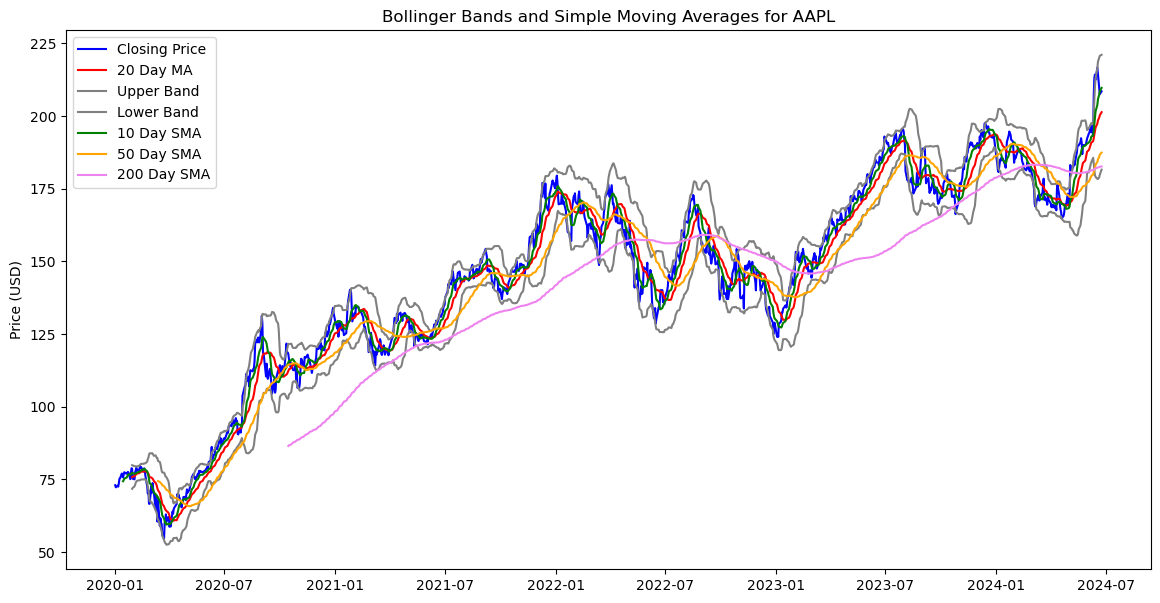

In [5]:
# Plotting Bollinger Bands, Simple Moving Averages and Closing Prices
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Closing Price', color='blue')
plt.plot(tickerDf['20 Day MA'], label='20 Day MA', color='red')
plt.plot(tickerDf['Upper Band'], label='Upper Band', color='grey')
plt.plot(tickerDf['Lower Band'], label='Lower Band', color='grey')
plt.plot(tickerDf['SMA_10'], label='10 Day SMA', color='green')
plt.plot(tickerDf['SMA_50'], label='50 Day SMA', color='orange')
plt.plot(tickerDf['SMA_200'], label='200 Day SMA', color='violet')
plt.title('Bollinger Bands and Simple Moving Averages for ' + tickerSymbol)
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


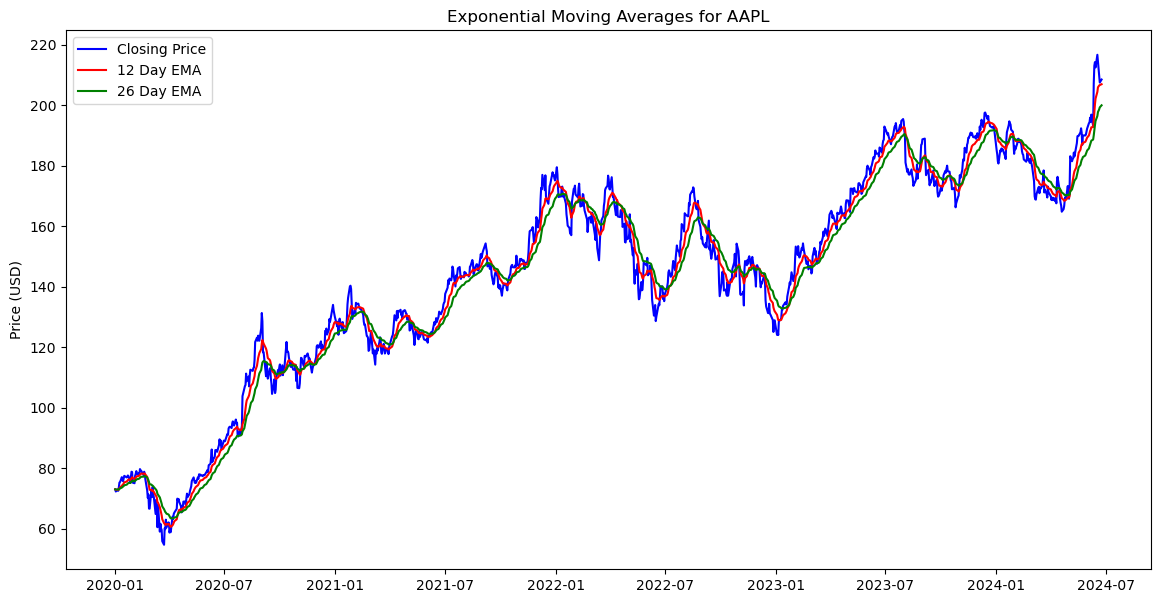

In [6]:
# Plotting Exponential Moving Averages
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['Close'], label='Closing Price', color='blue')
plt.plot(tickerDf['EMA_12'], label='12 Day EMA', color='red')
plt.plot(tickerDf['EMA_26'], label='26 Day EMA', color='green')
plt.title('Exponential Moving Averages for ' + tickerSymbol)
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


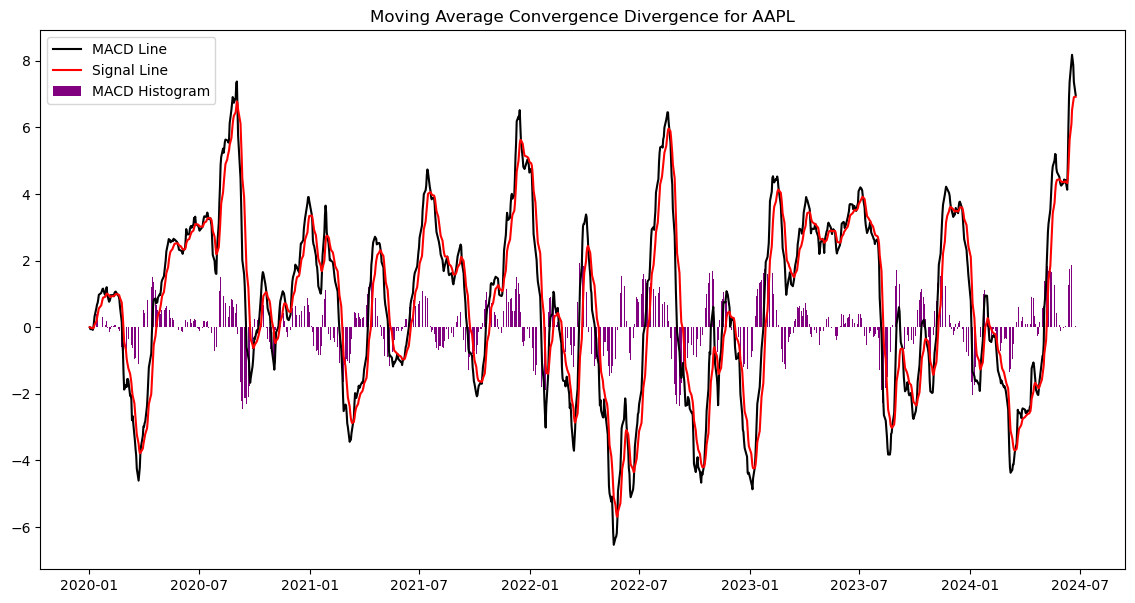

In [7]:
# Plotting Moving Average Convergence Divergence
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['MACD_line'], label='MACD Line', color='k')
plt.plot(tickerDf['Signal_line'], label='Signal Line', color='r')
plt.bar(tickerDf.index, tickerDf['MACD_Hist'], label='MACD Histogram', color='purple')
plt.title('Moving Average Convergence Divergence for ' + tickerSymbol)
plt.legend()
plt.show()

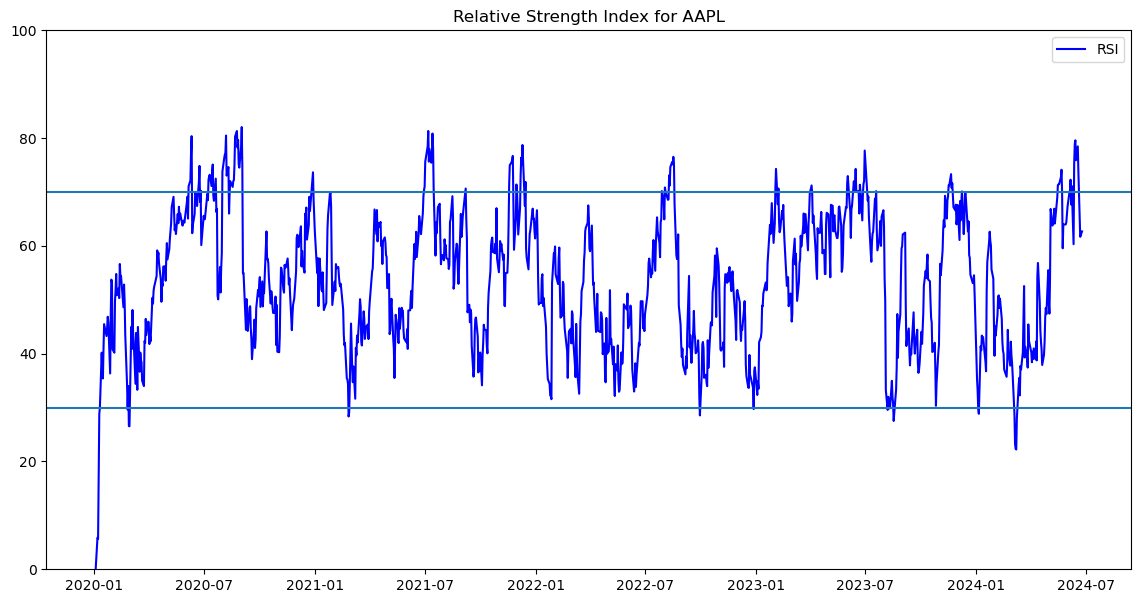

In [8]:
# Plotting Relative Strength Index
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['RSI'], label='RSI', color='blue')
plt.axhline([30])
plt.axhline([70])
plt.title('Relative Strength Index for ' + tickerSymbol)
plt.ylim(0,100)
plt.legend()
plt.show()


Implements a trading strategy based on Bollinger Bands: buys 100 shares when the closing price is below the lower Bollinger Band, and sells all shares when the closing price is above the upper Bollinger Band.

In [9]:
initial_capital = 10000  # Define your initial capital

# Create a dataframe to hold the trading strategy actions
trades = pd.DataFrame(index=tickerDf.index)
trades['Close'] = tickerDf['Close']
trades['Lower Band'] = tickerDf['Lower Band']
trades['Upper Band'] = tickerDf['Upper Band']
trades['Buy_Signal'] = (trades['Close'] < trades['Lower Band']).astype(int)
trades['Sell_Signal'] = (trades['Close'] > trades['Upper Band']).astype(int)
trades.tail(100)


,Close,Lower Band,Upper Band,Buy_Signal,Sell_Signal
Date,,,,,
2024-01-31 00:00:00-05:00,183.915543,178.204708,196.465360,0,0
2024-02-01 00:00:00-05:00,186.369095,178.475968,196.454417,0,0
2024-02-02 00:00:00-05:00,185.361740,179.064448,196.258901,0,0
2024-02-05 00:00:00-05:00,187.186920,180.028062,195.943579,0,0
2024-02-06 00:00:00-05:00,188.802673,180.328027,196.016633,0,0
...,...,...,...,...,...
2024-06-17 00:00:00-04:00,216.669998,178.356446,216.376552,0,1
2024-06-18 00:00:00-04:00,214.289993,178.340848,218.717151,0,0
2024-06-20 00:00:00-04:00,209.679993,178.839720,219.951277,0,0


<Axes: xlabel='Date'>

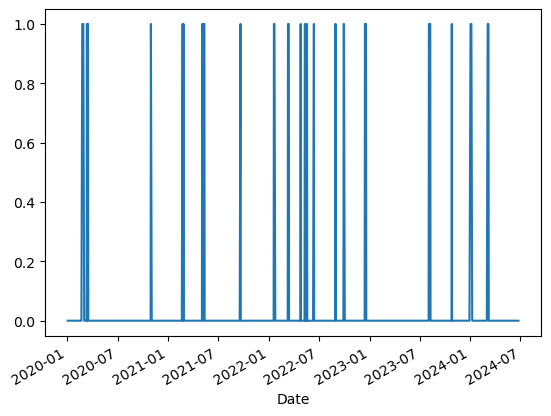

In [10]:
trades.Buy_Signal.plot()

In [11]:
# Create a dataframe for positions and holdings
positions = pd.DataFrame(index=trades.index).fillna(0)
holdings = pd.DataFrame(index=trades.index).fillna(0.0)



In [22]:
# Buy a 100 shares when the buy signal is triggered

num_of_shares = int(initial_capital / trades.iloc[0]['Close']) # 100

positions['Holdings'] = num_of_shares*trades['Buy_Signal']
# positions.describe()

In [23]:
# Update holdings. Sell all shares when the sell signal is triggered
positions['Holdings'] = positions['Holdings'] - num_of_shares*trades['Sell_Signal']

In [24]:
positions.describe()

,Holdings
count,1126.000000
mean,-2.920071
std,43.894852
min,-137.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,137.000000


In [25]:
# Update holdings. Can't sell if we don't have any
positions['Holdings'] = positions['Holdings'].clip(lower=0)
positions.describe()

,Holdings
count,1126.000000
mean,5.596803
std,27.131006
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,137.000000


In [26]:
# Initialize the portfolio with value owned
holdings['Holdings'] = positions.multiply(trades['Close'], axis=0)

In [27]:
# Store the difference in shares owned
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio = holdings

# Add `cash` to portfolio
portfolio['Cash'] = initial_capital - (pos_diff.multiply(trades['Close'], axis=0)).cumsum()

# Add `total` to portfolio
portfolio['Total'] = portfolio['Cash'] + portfolio['Holdings']

# Add `returns` to portfolio
portfolio['Returns'] = portfolio['Total'].pct_change()

portfolio.head(50)

,Holdings,Cash,Total,Returns
Date,,,,
2020-01-02 00:00:00-05:00,0.000000,NaN,NaN,NaN
2020-01-03 00:00:00-05:00,0.000000,10000.000000,10000.000000,NaN
2020-01-06 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-07 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-08 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-09 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-10 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-13 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000
2020-01-14 00:00:00-05:00,0.000000,10000.000000,10000.000000,0.000000


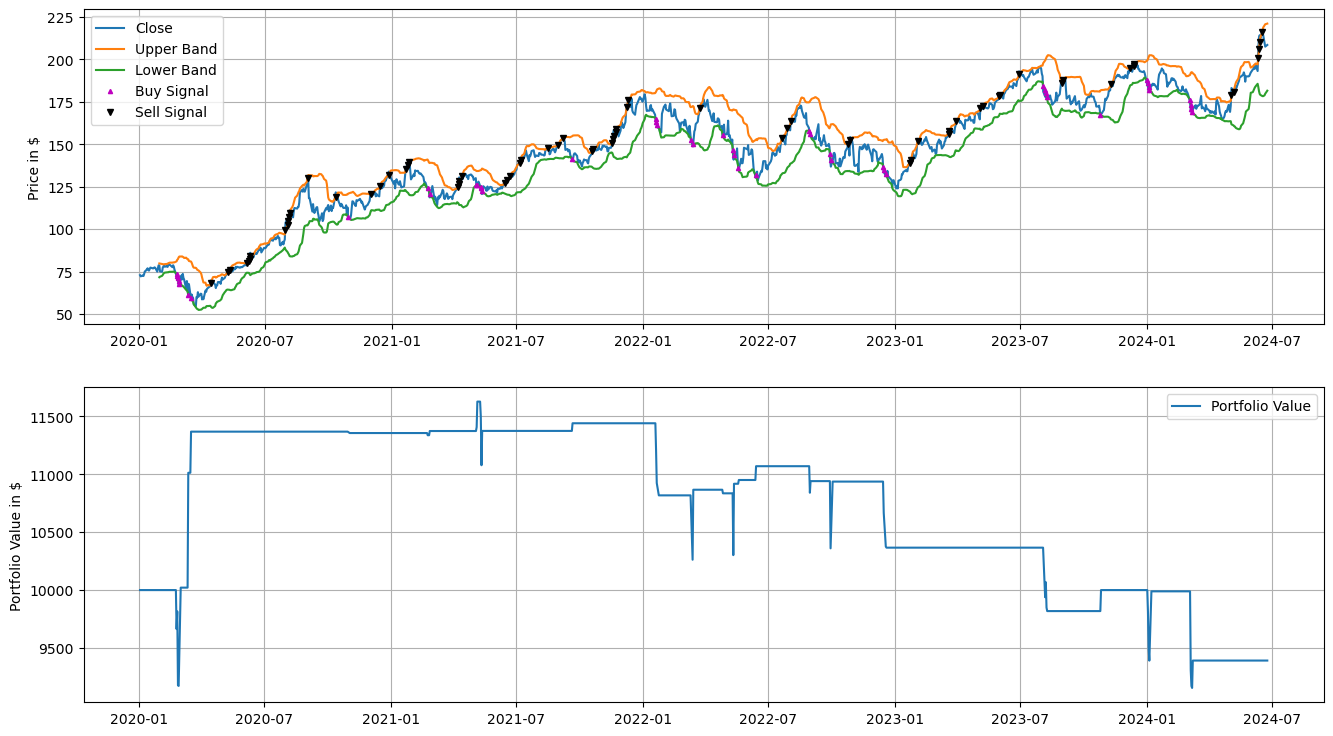

In [18]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 9))

for c in ['Close', 'Upper Band', 'Lower Band']:
    ax1.plot(trades.index, trades[c], label=c)
ax1.plot(trades.loc[trades['Buy_Signal'] == 1].index, trades.loc[trades['Buy_Signal'] == 1]['Lower Band'], '^', markersize=3, color='m', label='Buy Signal')
ax1.plot(trades.loc[trades['Sell_Signal'] == 1].index, trades.loc[trades['Sell_Signal'] == 1]['Upper Band'], 'v', markersize=5, color='k', label='Sell Signal')
ax1.set_ylabel('Price in $')
ax1.legend(loc='best')
ax1.grid()

ax2.plot(portfolio.index, portfolio['Total'], label='Portfolio Value')
ax2.set_ylabel('Portfolio Value in $')
ax2.legend(loc='best')
ax2.grid()

plt.show()

Compares this strategy to a simple 'Buy and Hold' strategy for S&P 500 by calculating and plotting the portfolio growth for both strategies.

In [19]:
# Download S&P 500 data
sp_data = yf.Ticker('^GSPC').history(start='2020-1-1')


In [20]:
# Create a new dataframe to hold the 'Buy and Hold' strategy
bh_portfolio = pd.DataFrame(index=sp_data.index)
bh_portfolio['Close'] = sp_data['Close']
bh_portfolio['Returns'] = bh_portfolio['Close'].pct_change()
# Buy at the start and hold
bh_portfolio['Holdings'] = initial_capital/bh_portfolio.iloc[0]['Close']*bh_portfolio['Close']
# bh_portfolio['Cash'] = initial_capital - bh_portfolio['Holdings']
bh_portfolio['Total'] = bh_portfolio['Holdings']

bh_portfolio

,Close,Returns,Holdings,Total
Date,,,,
2020-01-02 00:00:00-05:00,3257.850098,NaN,10000.000000,10000.000000
2020-01-03 00:00:00-05:00,3234.850098,-0.007060,9929.401294,9929.401294
2020-01-06 00:00:00-05:00,3246.280029,0.003533,9964.485572,9964.485572
2020-01-07 00:00:00-05:00,3237.179932,-0.002803,9936.552741,9936.552741
2020-01-08 00:00:00-05:00,3253.050049,0.004902,9985.266207,9985.266207
...,...,...,...,...
2024-06-17 00:00:00-04:00,5473.229980,0.007664,16800.128356,16800.128356
2024-06-18 00:00:00-04:00,5487.029785,0.002521,16842.486980,16842.486980
2024-06-20 00:00:00-04:00,5473.169922,-0.002526,16799.944005,16799.944005


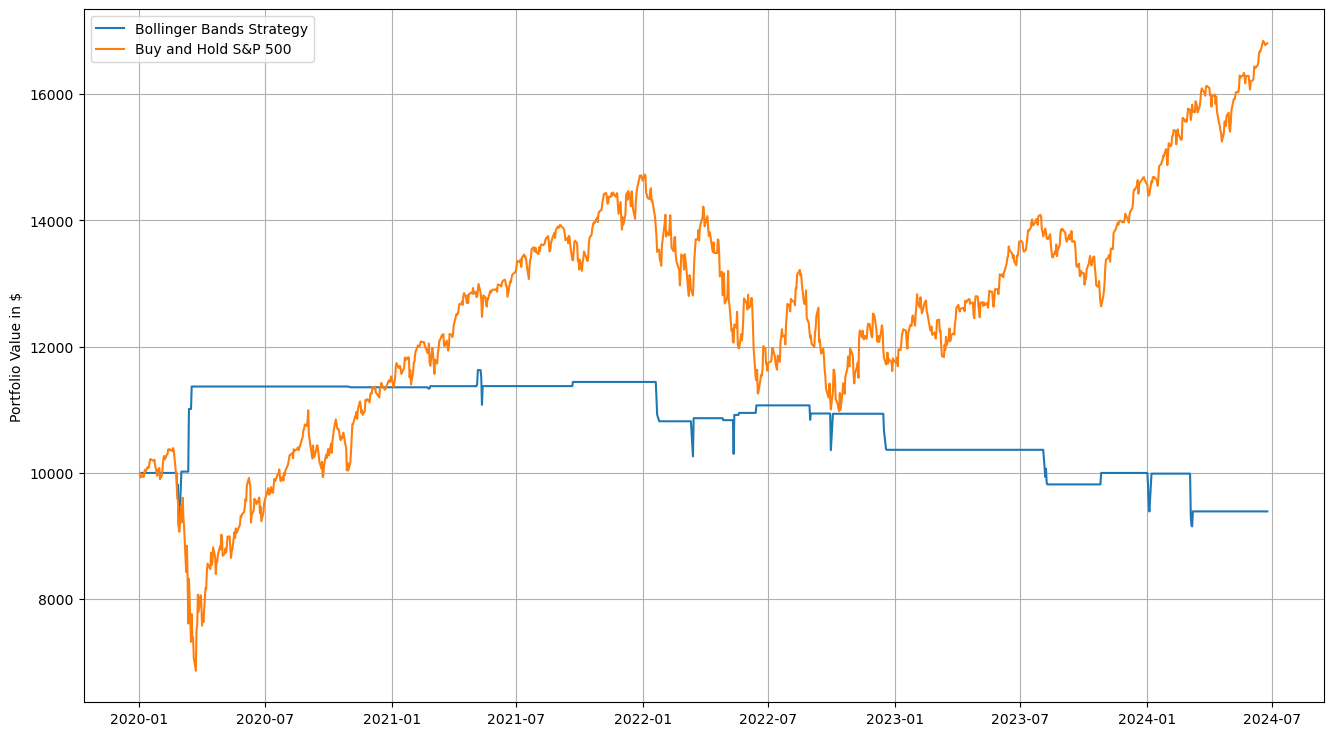

In [21]:



# Plot both the Bollinger Bands strategy and 'Buy and Hold' strategy
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(portfolio.index, portfolio['Total'], label='Bollinger Bands Strategy')
ax.plot(bh_portfolio.index, bh_portfolio['Total'], label='Buy and Hold S&P 500')
ax.set_ylabel('Portfolio Value in $')
ax.legend(loc='best')
ax.grid()

plt.show()
